In [27]:
from os import environ as ENV

import pandas as pd
import bct
import scipy
import matplotlib.pyplot as plt

In [3]:
import sys
sys.path.append('..')

from circuit_postprocess import *
from should_be_stdlib import *
from neurodata import *
from circuits import *

In [4]:
record = load_record(DEFAULT_RECORD)
sig_neurons = get_sig_neurons(record)
tuning_curves = get_tuning_curves(record).loc[sig_neurons]
coords = get_coords(record).loc[sig_neurons]

In [28]:
quantum_fidelity_amp_qft = pd.read_csv(ENV['PWD'] + '/data/quantum_fidelity_amp_qft.csv', index_col=[0])
quantum_fidelity_amp_qft

,23,32,35,36,37,50,53,55,57,59,...,411,416,419,420,421,424,425,426,428,435
A,,,,,,,,,,,,,,,,,,,,,
23,0.000000,0.533679,0.979622,0.840222,0.913091,0.967589,0.967827,0.974373,0.973817,0.886041,...,0.940487,0.861481,0.899966,0.704255,0.768436,0.741219,0.983504,0.893984,0.905702,0.880804
32,0.533679,0.000000,0.505821,0.756327,0.743357,0.589544,0.643418,0.518685,0.527427,0.733960,...,0.733869,0.782006,0.675080,0.824018,0.327743,0.222765,0.579517,0.704406,0.716002,0.759984
35,0.979622,0.505821,0.000000,0.823592,0.894313,0.965378,0.963320,0.966282,0.969029,0.890045,...,0.927518,0.861849,0.896517,0.688116,0.770432,0.716861,0.985529,0.872497,0.906794,0.876814
36,0.840222,0.756327,0.823592,0.000000,0.902536,0.852350,0.938297,0.833881,0.786343,0.872102,...,0.910139,0.886065,0.873922,0.817397,0.472862,0.592797,0.849908,0.889740,0.840296,0.914960
37,0.913091,0.743357,0.894313,0.902536,0.000000,0.955456,0.974450,0.912261,0.916161,0.981161,...,0.980789,0.979052,0.901016,0.897565,0.662721,0.607962,0.935234,0.971589,0.957320,0.985126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,0.741219,0.222765,0.716861,0.592797,0.607962,0.742188,0.680093,0.807233,0.725196,0.531573,...,0.623233,0.494619,0.616490,0.347048,0.533880,0.000000,0.695431,0.671149,0.501565,0.553248
425,0.983504,0.579517,0.985529,0.849908,0.935234,0.982464,0.978431,0.969565,0.987369,0.925452,...,0.960034,0.767612,0.940233,0.746205,0.786307,0.695431,0.000000,0.895345,0.941367,0.911348
426,0.893984,0.704406,0.872497,0.889740,0.971589,0.939023,0.952292,0.907442,0.875234,0.942268,...,0.959649,0.924114,0.825082,0.847333,0.595526,0.671149,0.895345,0.000000,0.900084,0.960706


In [66]:
thr_07 = bct.threshold_absolute(quantum_fidelity_amp_qft.to_numpy(), 0.7)

In [67]:
rent_exp(thr_07, coords)

Rent's exponent: 0.8651598417919134
Standard error of the estimation: 0.0378281640898166


(np.float64(0.8651598417919134), np.float64(0.0378281640898166))

In [68]:
is_rentian_scaling(thr_07, coords)

Power law R^2: 0.98
Exponential law R^2: 0.79
Rentian scaling achieved


(0.9787052808965235, 0.7882713919272542)

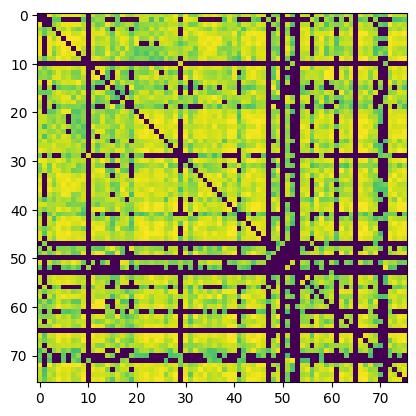

In [69]:
plt.imshow(thr_07)

In [70]:
# how does this compare with the euclidean distance analysis?
euclidean_distance = pd.read_csv('/home/user/work/quadrigems/data/euclidean_distance.csv', index_col=[0])
euclidean_distance

,23.0,32.0,35.0,36.0,37.0,50.0,53.0,55.0,57.0,59.0,...,411.0,416.0,419.0,420.0,421.0,424.0,425.0,426.0,428.0,435.0
A,,,,,,,,,,,,,,,,,,,,,
23.0,0.000000,67.192401,18.765622,36.943929,20.420796,13.398795,14.488655,20.059946,27.458729,20.544325,...,16.421985,42.247199,31.964964,26.794152,451.826171,79.604133,13.569228,29.502291,22.911957,26.008402
32.0,67.192401,0.000000,63.222102,49.487140,51.517189,61.252243,65.019070,60.537082,61.940731,54.230464,...,55.720728,47.106849,51.108467,58.607171,442.736740,95.178496,60.551470,52.923664,55.860978,50.537228
35.0,18.765622,63.222102,0.000000,33.413854,22.603101,16.312246,20.712320,18.625860,25.604454,14.721620,...,19.765018,34.846139,30.496417,29.205633,447.499547,78.657388,11.168605,27.685176,18.501035,21.506001
36.0,36.943929,49.487140,33.413854,0.000000,29.148002,37.973924,38.667406,34.153945,38.424935,28.895573,...,33.879329,29.629072,33.999074,40.114624,443.777439,76.953370,32.852051,30.363699,30.415266,22.354609
37.0,20.420796,51.517189,22.603101,29.148002,0.000000,18.159809,23.854127,18.262469,20.815494,14.200901,...,18.446968,26.791937,26.486501,27.185847,441.940939,74.907338,16.893511,19.914243,16.978733,13.083985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424.0,79.604133,95.178496,78.657388,76.953370,74.907338,79.591920,89.596053,64.993711,63.508928,82.598723,...,84.858840,73.534246,81.692503,97.215947,397.742645,0.000000,78.126931,67.266531,80.842099,77.645200
425.0,13.569228,60.551470,11.168605,32.852051,16.893511,10.715781,17.042267,16.132264,20.801712,12.238504,...,16.212104,33.357608,23.095944,25.492371,446.805267,78.126931,0.000000,28.633609,18.058605,19.578865
426.0,29.502291,52.923664,27.685176,30.363699,19.914243,29.175912,34.858003,23.789883,29.805281,25.420280,...,26.405616,31.886097,41.582447,39.825232,439.408090,67.266531,28.633609,0.000000,23.502244,20.485892


In [71]:
thr_07_euc = bct.threshold_absolute(euclidean_distance.corr().to_numpy(), 0.7)

In [72]:
rent_exp(thr_07_euc, coords)

Rent's exponent: 0.8565448717882886
Standard error of the estimation: 0.017007386628253403


(np.float64(0.8565448717882886), np.float64(0.017007386628253403))

In [73]:
is_rentian_scaling(thr_07_euc, coords)

Power law R^2: 0.98
Exponential law R^2: 0.78
Rentian scaling achieved


(0.9804660881653021, 0.775073279511116)

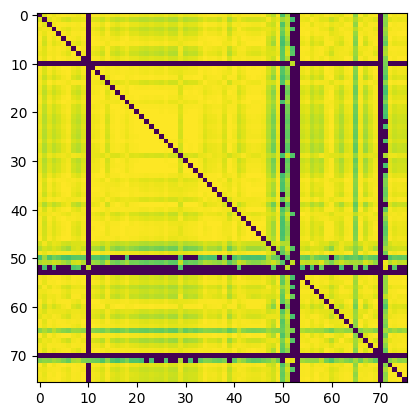

In [74]:
plt.imshow(thr_07_euc)

(array([ 136.,   96.,  184.,  214.,  168.,  284.,  398.,  726., 1494.,
        2076.]),
 array([0.        , 0.09937381, 0.19874761, 0.29812142, 0.39749522,
        0.49686903, 0.59624284, 0.69561664, 0.79499045, 0.89436425,
        0.99373806]),
 <BarContainer object of 10 artists>)

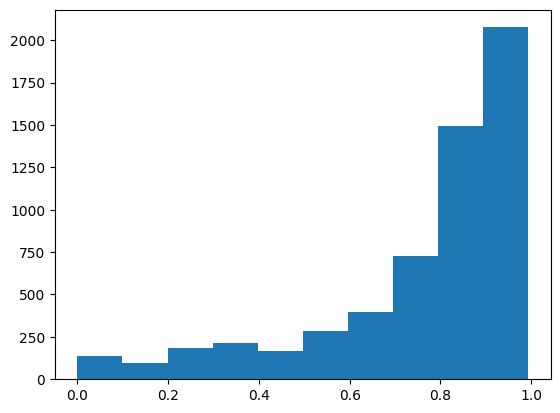

In [80]:
plt.hist(quantum_fidelity_amp_qft.to_numpy().flatten())

(array([3.73e+03, 1.15e+03, 3.68e+02, 2.20e+02, 7.00e+01, 8.80e+01,
        2.00e+00, 4.00e+00, 2.60e+01, 1.18e+02]),
 array([  0.        ,  48.95328646,  97.90657292, 146.85985938,
        195.81314584, 244.7664323 , 293.71971875, 342.67300521,
        391.62629167, 440.57957813, 489.53286459]),
 <BarContainer object of 10 artists>)

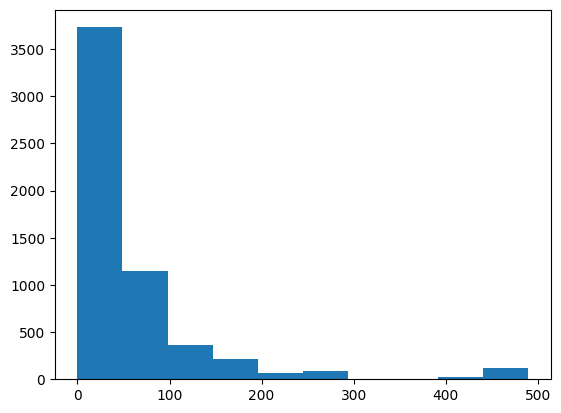

In [82]:
plt.hist(euclidean_distance.to_numpy().flatten())